In [ ]:
import pandas as pd
df = pd.read_csv('/content/Billionaires Statistics Dataset.csv')
print(df.shape)

(2640, 20)


# 1. What are the top 10 richest billionaires in the world?

In [ ]:
df_sorted = df.sort_values(by='final Worth', ascending=False)
top_10 = df_sorted.head(2)
print(top_10[['personName', 'final Worth']])

                 personName  final Worth
0  Bernard Arnault & family       211000
1                 Elon Musk       180000


#2.What is the average net worth of the top 100 billionaires?

In [ ]:
top100 = df_sorted.head(100)
averagenetworth = top100['final Worth'].mean()
print(f"Average net worth of top 100 billionaires: ${averagenetworth}")

Average net worth of top 100 billionaires: $40321.0


# 3. What is the most common industry among the top 500 billionaires?

In [ ]:
most_common_industry = df['industries'].mode()[0]
print(f"The most common industry is: {most_common_industry}")

The most common industry is: Finance & Investments


# 4. How many billionaires come from each country?

In [ ]:
billionaires_by_country = df['country'].value_counts()
print(billionaires_by_country)

country
United States               754
China                       523
India                       157
Germany                     102
United Kingdom               82
                           ... 
Turks and Caicos Islands      1
Tanzania                      1
Bahrain                       1
Andorra                       1
Armenia                       1
Name: count, Length: 78, dtype: int64


#5. What is the total net worth of all billionaires?

In [ ]:
totalnetworth = df['final Worth'].sum()
print(f"Total net worth of all billionaires: ${totalnetworth}")

Total net worth of all billionaires: $12206800


#6. Which billionaire has seen the biggest increase in net worth this year?

In [ ]:
df['finalWorthIncrease'] = df['final Worth'] - df['final Worth']
biggest_increase = df.loc[df['finalWorthIncrease'].idxmax()]

In [ ]:
df['finalWorthIncrease'].idxmax()

0

In [ ]:
df.loc[df['finalWorthIncrease'].idxmax()]


,0
rank,1
final Worth,211000
category,Fashion & Retail
personName,Bernard Arnault & family
age,74.0
country,France
city,Paris
source,LVMH
industries,Fashion & Retail
country Of Citizenship,France


In [ ]:
df['finalWorthIncrease']

,finalWorthIncrease
0,0
1,0
2,0
3,0
4,0
...,...
2635,0
2636,0
2637,0
2638,0


In [ ]:
biggest_increase

,0
rank,1
final Worth,211000
category,Fashion & Retail
personName,Bernard Arnault & family
age,74.0
country,France
city,Paris
source,LVMH
industries,Fashion & Retail
country Of Citizenship,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      2640 non-null   int64  
 1   final Worth               2640 non-null   int64  
 2   category                  2640 non-null   object 
 3   personName                2640 non-null   object 
 4   age                       2575 non-null   float64
 5   country                   2602 non-null   object 
 6   city                      2568 non-null   object 
 7   source                    2640 non-null   object 
 8   industries                2640 non-null   object 
 9   country  Of  Citizenship  2640 non-null   object 
 10  organization              325 non-null    object 
 11  status                    2640 non-null   object 
 12  gender                    2640 non-null   object 
 13  birthDate                 2564 non-null   object 
 14  title   

#7. How does the average net worth of billionaires change by age group?

In [ ]:
df['birthDate'] = pd.cut(df['age'], bins=[0, 1945, 1965, 1985, 2000], labels=['19th to 20th century', '20th to 21st century', '21st to 22nd century', '22nd to 23rd century'])
age_group_avg_net_worth = df.groupby('birthDate')['final Worth'].mean()
print(age_group_avg_net_worth)

birthDate
19th to 20th century    4679.262136
20th to 21st century            NaN
21st to 22nd century            NaN
22nd to 23rd century            NaN
Name: final Worth, dtype: float64


/tmp/ipython-input-18-3517184137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_net_worth = df.groupby('birthDate')['final Worth'].mean()


#8. What is the distribution of billionaires by net worth?

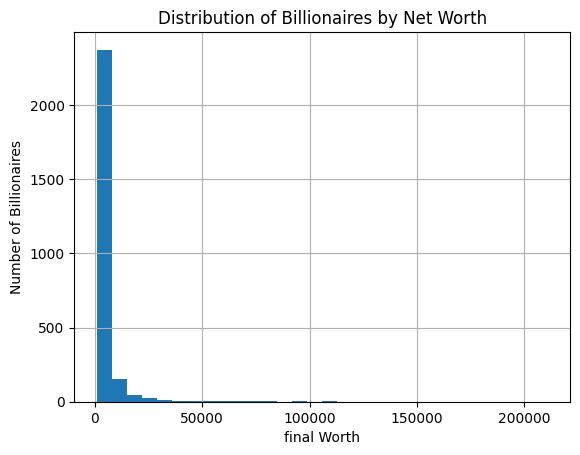

In [ ]:
import matplotlib.pyplot as plt
df['final Worth'].hist(bins=30)
plt.xlabel('final Worth')
plt.ylabel('Number of Billionaires')
plt.title('Distribution of Billionaires by Net Worth')
plt.show()

#9. What percentage of billionaires are from technology?

In [ ]:
tech_billionaires = df[df['industries'] == 'Technology']
tech_percentage = (len(tech_billionaires) / len(df)) * 100
print(f"Percentage of billionaires from technology: {tech_percentage}%")

Percentage of billionaires from technology: 11.893939393939394%


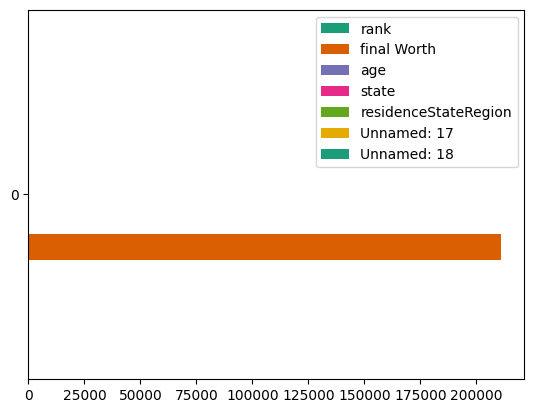

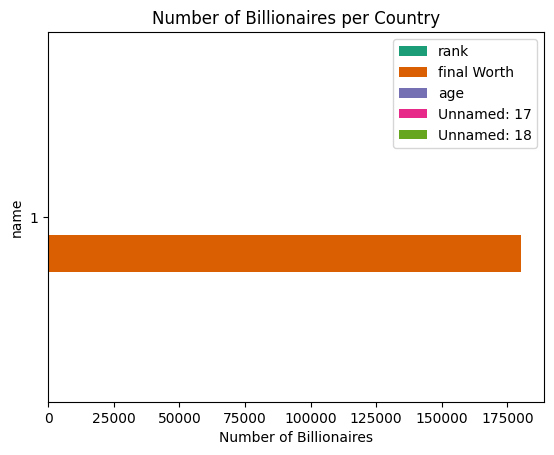

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'personName' and count the number of entries in each group
billionaires_by_country = df.groupby(top_10['personName'])

# Plot the results
billionaires_by_country.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[ 'top'].set_visible(True)
plt.xlabel('Number of Billionaires') # Add an x-axis label for clarity
plt.ylabel('name') # Add a y-axis label for clarity
plt.title('Number of Billionaires per Country') # Add a title for clarity
plt.show() # Display the plot

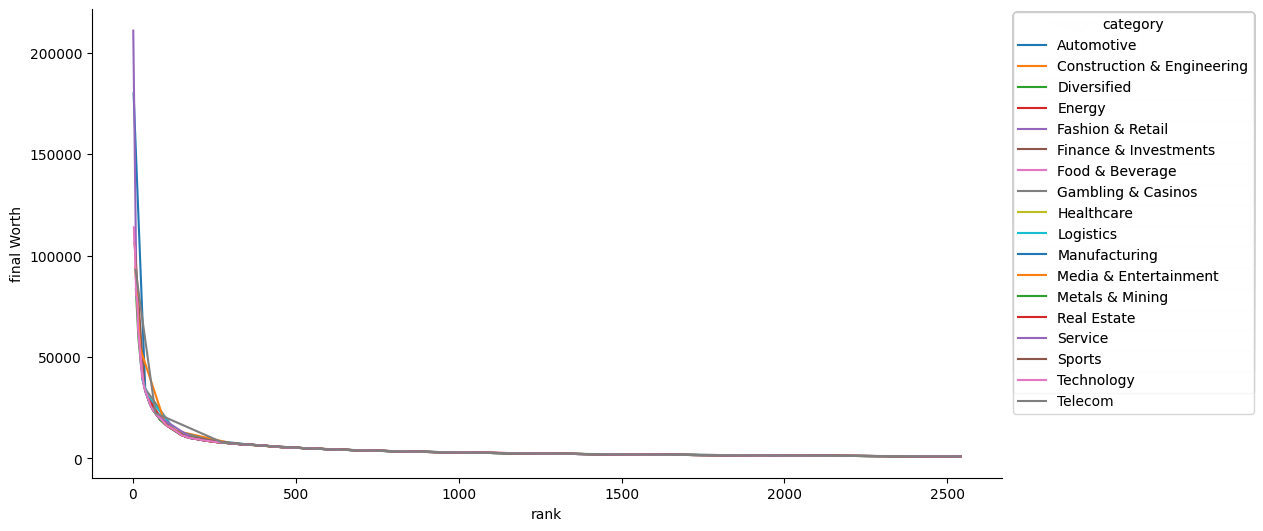

In [15]:
# Time Series
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  xs = series['rank']
  ys = series['final Worth']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('rank', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rank')
_ = plt.ylabel('final Worth')

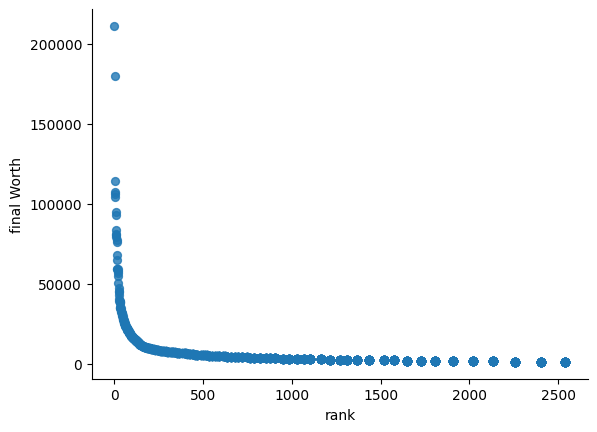

In [17]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rank', y='final Worth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

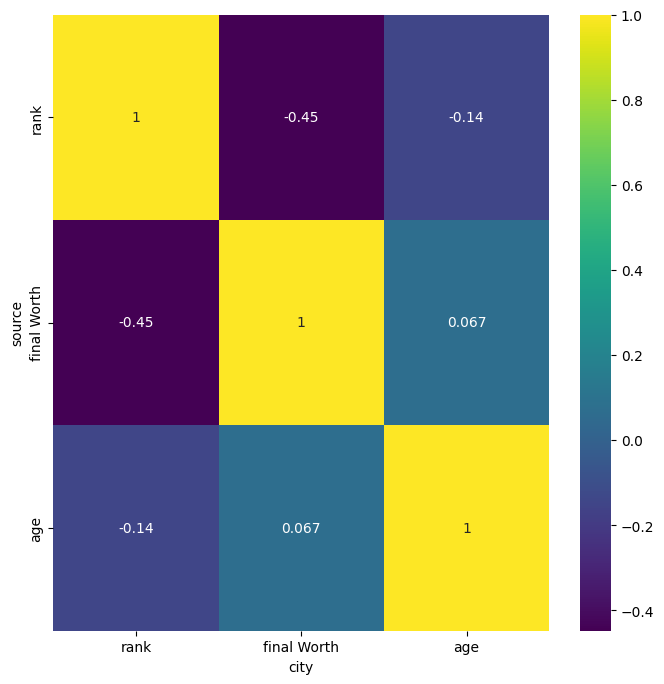

In [19]:
#heatmap
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
# Select relevant columns and drop rows with missing values for the heatmap
df_heatmap = df[['rank', 'final Worth', 'age']].dropna()
sns.heatmap(df_heatmap.corr(), cmap='viridis', annot=True)
plt.xlabel('city')
_ = plt.ylabel('source')